In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 뉴스 헤드라인을 이용하여, 뉴스의 주제를 분류
- title(헤드라인)이 주어지고 
- 뉴스의 주제를 분류
- 심사기준 Accuracy
- 리더보드 점수 순위 (0.86, 0.84, 0.83 ...)

In [2]:
train = pd.read_csv("/opt/ml/data/news_topic/train_data.csv")
train.head(5)

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


## 눈으로 데이터를 확인해보기
- 뉴스 Title 이기 때문에, 띄어쓰기는 잘 되어 있음
- 나라, 정당을 나타낼 때 사용하는 한자어
- G2, 5G 등 한국어가 아니지만 중요한 단어 존재
- 프로, 선수, 등 토픽별로 자주 나오는 단어 존재
- 단어 위주의 구성(동사, 조사 같은 것 거의 없음)
- 오타가 적음

In [3]:
topic_index = pd.read_csv("/opt/ml/data/news_topic/topic_dict.csv")
topic_index

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


### Topic 분포

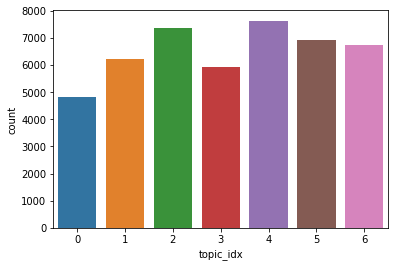

In [4]:
# import matplotlib 
# matplotlib.font_manager._rebuild()
# sns.set(font="AppleGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

# dic = topic_index.to_dict()
# t = train['topic_idx'].map(dic['topic'])
# t = pd.DataFrame(t)
sns.countplot(x='topic_idx', data=train)

- 전체적으로 분포는 비슷하기는 하다.
- 세계 > 사회 > 스포츠 > 정치 > 경제 > 생활문화 > IT 순
- 각 topic 별로 나오는 단어들에도 특징이 있지 않을까?
- 정치쪽이라면 한자가 많이 나오지 않을까?

In [5]:
# 한글 넣어서 하려고 했는데 안되네??

# group_cnt = train['topic_idx'].value_counts().sort_index()
# group_cnt

# fig, ax = plt.subplots(1, 1, figsize=(12, 7))
# ax.bar(topic_index.topic, group_cnt)
# plt.show()

### 토픽에 따른 단어들 파악

In [6]:
it = train[train.topic_idx == 0]
eco = train[train.topic_idx == 1]
soc = train[train.topic_idx == 2]
life = train[train.topic_idx == 3]
wor = train[train.topic_idx == 4]
spo = train[train.topic_idx == 5]
pol = train[train.topic_idx == 6]

In [7]:
pol

,index,title,topic_idx
43,43,김영남 우리 민족 위상 과시…뜨거운 분위기 이어가길,6
48,48,적극행정 추진전략 및 성과공유대회 참석한 이낙연 총리,6
49,49,朴대통령 한일 합의에 소녀상 언급없어…선동하면 안돼,6
50,50,민주 국회의원 재보선 4곳 후보 공모에 7명 신청,6
53,53,현행 헌법과 다른 점은 ②지방자치·경제민주화 개념 강화,6
...,...,...,...
45590,45590,박지원 책임있는 위치에 있는 사람들 청문회 증인대 세워야,6
45603,45603,北 고난의 행군 이어 군자리정신까지…대북제재 효과,6
45611,45611,北 연이은 도발에 靑 신속·단호 대응…내부선 수위조절 고민도,6
45627,45627,정의당 박근혜 역사의 대죄인…징역 24년 턱없이 부족,6


In [8]:
from tqdm import tqdm

# 다양한 한국어 형태소 분석기가 클래스로 구현되어 있음
from konlpy import tag 

from collections import defaultdict

import math

모델 중에서는 Okt가 가장 무난할 것 같다.

https://soohee410.github.io/compare_tagger


In [9]:
tokenizer = tag.Okt()

def make_tokenized(data):
  tokenized = []
  for sent in tqdm(data):
    tokens = tokenizer.nouns(sent)
    tokenized.append(tokens)

  return tokenized

In [10]:
train_tokenized = make_tokenized(it.title)

100%|██████████| 4824/4824 [00:09<00:00, 501.56it/s]


In [11]:
word_count = defaultdict(int)
noun_adj_list = []

for tokens in tqdm(train_tokenized):
  for token in tokens:
    word_count[token] += 1
    noun_adj_list.append(token)

word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(list(word_count)[:30])    

100%|██████████| 4824/4824 [00:00<00:00, 295817.46it/s]

[('출시', 515), ('개발', 421), ('삼성', 347), ('기술', 330), ('종합', 324), ('갤럭시', 279), ('네이버', 223), ('서비스', 216), ('전자', 192), ('스마트폰', 188), ('위', 181), ('공개', 180), ('노트', 167), ('폰', 165), ('게시판', 156), ('첫', 145), ('카카오', 144), ('구글', 137), ('한국', 135), ('국내', 134), ('인공', 133), ('모바일', 132), ('로봇', 128), ('지능', 124), ('아이폰', 124), ('게임', 121), ('연구', 116), ('스마트', 114), ('앱', 112), ('세계', 110)]


- 문장기호, 한글자 제외할 필요가 있음
    -> tokenizer에서 morphs -> nouns로 바꿔서 출력
- 문장에서 5G 라고 적혀 있으면 5G라고 구분할 수 있어야 할텐데  
    -> 이것은 따로 사전을 갖고 와서 진행해야 하는가?  
    -> 조사가 필요함 아직 진행 X

In [12]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

counts = Counter(noun_adj_list)
tags = counts.most_common(40) 

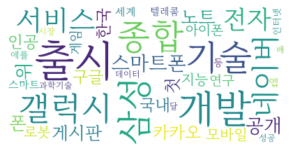

In [13]:
wc = WordCloud(font_path= '.ipynb_checkpoints/MaruBuri-Regular.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))
cloud.to_file('test.jpg')

plt.figure(figsize=(5,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
def make_wordcloud(data, jpg) : # data 에는 it.title 형태로 들어와야함
    train_tokenized = make_tokenized(data)
    #word_count = defaultdict(int)
    noun_adj_list = []

    for tokens in tqdm(train_tokenized):
        for token in tokens:
            #word_count[token] += 1
            noun_adj_list.append(token)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(40)   

    wc = WordCloud(font_path= '.ipynb_checkpoints/MaruBuri-Regular.ttf',background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))
    cloud.to_file(jpg)

    plt.figure(figsize=(5,5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()    


100%|██████████| 4824/4824 [00:00<00:00, 684136.01it/s]


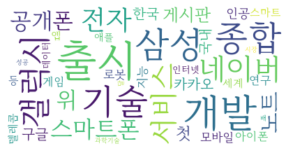

In [145]:
make_wordcloud(it.title, jpg='it.jpg')

100%|██████████| 6222/6222 [00:00<00:00, 581820.12it/s]


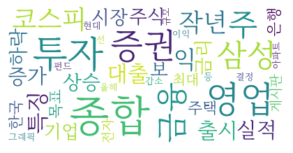

In [146]:
make_wordcloud(eco.title, jpg='eco.jpg')

100%|██████████| 7362/7362 [00:00<00:00, 606220.87it/s]


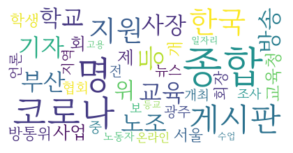

In [147]:
make_wordcloud(soc.title, jpg='soc.jpg')

100%|██████████| 5933/5933 [00:00<00:00, 594122.14it/s]


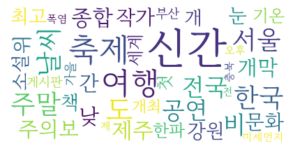

In [148]:
make_wordcloud(life.title, jpg='life.jpg')

100%|██████████| 7629/7629 [00:00<00:00, 597921.09it/s]


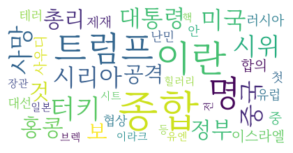

In [149]:
make_wordcloud(wor.title, jpg='wor.jpg')

100%|██████████| 6933/6933 [00:00<00:00, 568517.66it/s]


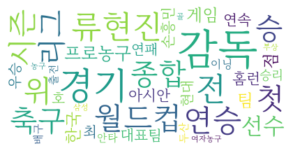

In [150]:
make_wordcloud(spo.title, jpg='spo.jpg')

100%|██████████| 6751/6751 [00:00<00:00, 564688.62it/s]


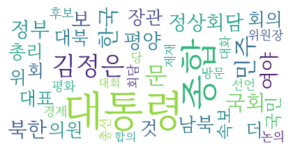

In [151]:
make_wordcloud(pol.title, jpg='pol.jpg')

100%|██████████| 45654/45654 [00:00<00:00, 772005.72it/s]


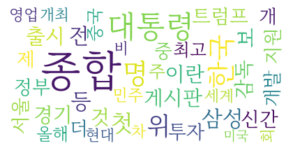

In [152]:
make_wordcloud(train.title, jpg='all.jpg')

- 각 topic마다 당연스러운 결과를 보여줌
- topic이 달라도 공통적으로 자주 나오는 말이 있을까?  
    -> 빈도 100위 까지의 단어들만 모아서 union(?) 해보기
- 각 topic 마다 긍정, 부정적인 워딩들의 비율도 다르지 않을까?  
    -> topic에 따라서 감성분석
- 형태소를 신경쓰지 않고 진행하기는 했지만, 어떤 topic에서는 형태소가 많이 나올지도?  
    -> 형태소 단위가 많이 나오는 뉴스 주제는?

In [12]:
all_tokenized = make_tokenized(train.title)

100%|██████████| 45654/45654 [01:04<00:00, 704.91it/s]


In [13]:
all_tokenized

[['인천', '핀란드', '항공기', '결항', '휴가', '철', '여행객', '분통'],
 ['실리콘밸리', '구글', '전역', '거점'],
 ['이란', '외무', '긴장', '완화', '해결', '책', '미국', '경제', '전쟁', '것'],
 ['클린턴', '측근', '기업', '특수', '관계', '조명', '공과', '사', '종합'],
 ['시진핑', '트럼프', '중미', '무역', '협상', '조속', '타결', '희망'],
 ['팔레스타인', '가자지구', '세', '소년', '이스라엘군', '총격', '사망'],
 ['인도', '파키스탄', '공습', '테러', '캠프', '폭격', '종합', '보'],
 ['대선', '토론', '음담패설', '만회', '실패', '트럼프', '사과', '대신', '클린턴', '공격', '역효과'],
 ['푸틴', '한반도', '상황', '진전', '위', '방안', '김정은', '위원장', '논의'],
 ['특검', '면죄부', '트럼프', '스캔들', '보도', '언론', '맹공', '국민', '적'],
 ['오키나와', '강제', '징용', '노동자', '추도'],
 ['이란', '최고', '지도자', '모욕', '혐의', '미국인', '징역', '선고'],
 ['카니발', '축제', '브라질', '리우', '대형', '유람선', '행렬'],
 ['올랜도', '병원', '최악', '총기', '테러', '부상', '치료', '비', '안'],
 ['대기업', '올해', '평균', '임금', '인상'],
 ['엘니뇨', '강력', '소멸', '듯'],
 ['이스라엘', '네타냐후', '유대교도', '병역', '문제', '연정', '협상', '진통'],
 ['사우디', '호르무즈', '호위', '연합', '참여'],
 ['사우디', '유조선', '공격', '예멘', '반군', '연결', '이란', '겨냥'],
 ['개천', '용', '나와라', '사업가', '모교', '장학금', '기부'],
 ['

In [15]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 18.3 MB/s 


In [14]:
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'gensim'